In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Stellar Lumens.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506 entries, 0 to 2505
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2506 non-null   object 
 1   Open        2506 non-null   float64
 2   High        2506 non-null   float64
 3   Low         2506 non-null   float64
 4   Close       2506 non-null   float64
 5   Volume      2506 non-null   float64
 6   Market Cap  2506 non-null   float64
dtypes: float64(6), object(1)
memory usage: 137.2+ KB


In [4]:
df.drop(['Date'],axis=1,inplace=True)

In [6]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [8]:
df.shape

(2506, 6)

In [9]:
df.describe()

,Open,High,Low,Close,Volume,Market Cap
count,2506.000000,2506.000000,2506.000000,2506.000000,2.506000e+03,2.506000e+03
mean,0.099832,0.105184,0.094293,0.099957,2.491788e+08,1.980580e+09
std,0.140714,0.149928,0.130896,0.140774,6.328471e+08,2.937068e+09
min,0.001352,0.001509,0.001227,0.001357,4.910920e+02,7.676789e+05
25%,0.002429,0.002546,0.002316,0.002435,4.628390e+04,1.273152e+07
50%,0.048046,0.050177,0.045722,0.048318,4.086575e+07,9.279223e+08
75%,0.121294,0.125438,0.116875,0.121372,2.256806e+08,2.337185e+09
max,0.892399,0.938144,0.677496,0.896227,1.040858e+10,1.685469e+10


In [10]:
df.isnull().sum()

Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

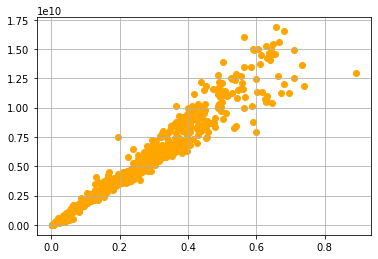

In [11]:
plt.scatter(df['Open'], df['Market Cap'], color='orange')
plt.grid(True)
plt.show()

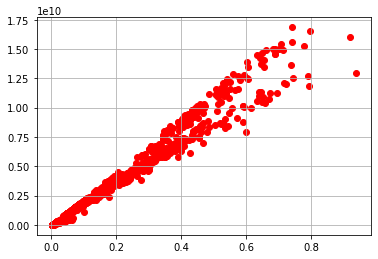

In [16]:
plt.scatter(df['High'], df['Market Cap'], color='red')
plt.grid(True)
plt.show()

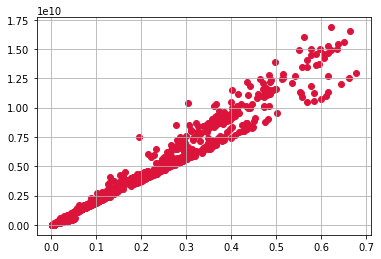

In [17]:
plt.scatter(df['Low'], df['Market Cap'], color='crimson')
plt.grid(True)
plt.show()

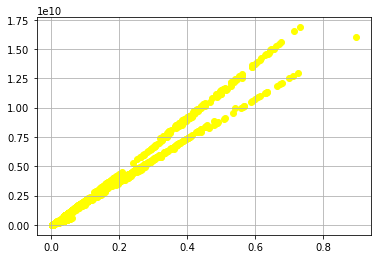

In [21]:
plt.scatter(df['Close'], df['Market Cap'], color='yellow')
plt.grid(True)
plt.show()

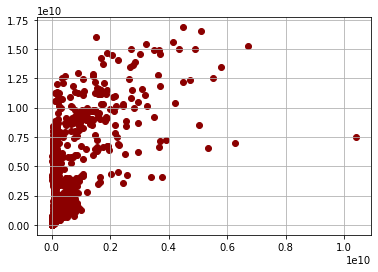

In [24]:
plt.scatter(df['Volume'], df['Market Cap'], color='darkred')
plt.grid(True)
plt.show()

#### MODEL

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn import utils
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [26]:
X=df.drop(["Market Cap"], axis=1)

y=df["Market Cap"]

In [27]:
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y)

In [28]:
print(utils.multiclass.type_of_target(y))

continuous


In [29]:
print(utils.multiclass.type_of_target(y.astype('int')))

multiclass


In [30]:
print(utils.multiclass.type_of_target(encoded))

multiclass


In [31]:
model1 =  LinearRegression()

In [32]:
scaler = StandardScaler()

X = scaler.fit_transform(X) 

In [33]:
X_train, X_test, encoded_train, encoded_test = train_test_split(X, encoded, train_size=0.7)

In [35]:
result = []
model1.fit(X_train, encoded_train)
result.append(model1.score(X_test, encoded_test))
result

[0.6792006909937134]

In [36]:
y_pred1 = model1.predict(X_test)

In [37]:
df2=pd.DataFrame({'Predicted values':y_pred1,'Actual values':encoded_test})
df2

,Predicted values,Actual values
0,1972.769220,2187
1,1509.718028,1969
2,827.789908,616
3,2309.403272,2260
4,824.553681,230
...,...,...
747,823.420654,220
748,990.968252,1131
749,822.801514,99
750,1357.445932,1828


In [38]:
import pickle
pkl_file= open('Stellar_lumens.pkl',"wb")
pickle.dump(model1,pkl_file)
pkl_file.close()

### OLS

In [40]:
from sklearn import linear_model
import statsmodels.api as sm

In [41]:
regr = linear_model.LinearRegression()
regr.fit(X, encoded)

LinearRegression()

In [42]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 1252.5
Coefficients: 
 [  519.26224669 -1338.95555602   546.06648221   856.88765942
    20.79381182]


In [43]:
X = sm.add_constant(X)

In [44]:
model = sm.OLS(encoded, X).fit()
predictions = model.predict(X) 

In [46]:
print_model = model.summary()
print(print_model) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     1118.
Date:                Fri, 25 Jun 2021   Prob (F-statistic):               0.00
Time:                        16:59:35   Log-Likelihood:                -18584.
No. Observations:                2506   AIC:                         3.718e+04
Df Residuals:                    2500   BIC:                         3.721e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1252.5000      8.042    155.747      0.0

In [48]:
X_train, X_test, encoded_train, encoded_test = train_test_split(X, encoded, train_size=0.7)

In [49]:
y_pred = model.predict(X_test)

In [50]:
df1=pd.DataFrame({'Predicted values':y_pred,'Actual values':encoded_test})
df1

,Predicted values,Actual values
0,1073.486130,1384
1,1993.772042,2199
2,1856.101561,2096
3,822.774175,639
4,895.422831,1105
...,...,...
747,828.865083,874
748,825.352816,710
749,824.445320,856
750,827.125362,762
